In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (LogLocator, FormatStrFormatter, MultipleLocator, AutoMinorLocator, FuncFormatter)
import matplotlib
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.ticker import (LogLocator,FormatStrFormatter)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
from astropy.coordinates import Angle
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter

source= { 'IC171106A': {'ra':340, 'dec': 7.4, 'IC50': "run00130214.evt000017569642.contour_50.txt", 'IC90':"run00130214.evt000017569642.contour_90.txt"},
          'IC191001A': {'ra':314.08,'dec': 12.94, 'IC50': 'run00133119.evt000022683750.contour_50.txt','IC90':'run00133119.evt000022683750.contour_90.txt'},
         'IC200107A': {'ra':148.18, 'dec': 35.46, 'IC50': "", 'IC90':""},
         'IC201222A': {'ra':206.37, 'dec': 13.44, 'IC50': "run00134818.evt000073718836.contour_50.txt", 'IC90':"run00134818.evt000073718836.contour_90.txt"},
         'IC201114A': {'ra':105.25, 'dec': 6.05, 'IC50': "", 'IC90':""},
         'GB6J0316+0904': {'ra':49.053058, 'dec':  9.078692, 'IC50': "", 'IC90':""},
    }

 

run='IC201222A'

# myfile=open(run)
# lines=myfile.readlines()
# n=np.array([])
# RA= np.array([])
# Dec = np.array([])
# UL = np.array([])


# for line in lines[1:530]:
#     n=np.append(n,float(line.split()[0])) 
#     RA=np.append(RA,float(line.split()[1])) 
#     Dec=np.append(Dec,float(line.split()[2]))
#     if len(line.split())==3:
#        UL=np.append(UL,np.nan) 
#     else:
#        UL=np.append(UL,float(line.split()[3]))   

df = pd.read_csv(run, delimiter=r"\s+")
df=df.drop(columns="#", axis=1)

## Method 1

In [116]:
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 8)
# pivotted= df.pivot('RA','Dec','Flux_UL')
# # pivotted.to_csv("pivo.csv")
# cmap = cm.get_cmap('viridis') 
# im=ax.imshow(pivotted, extent=(df.min(axis=0)['RA'] , df.max(axis=0)['RA'], df.min(axis=0)['Dec'] , df.max(axis=0)['Dec']), origin="lower",cmap=cmap)
# divider = make_axes_locatable(im.axes)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(im, cax=cax)
# ax.text(source[run]['ra'],source[run]['dec'], "+ "+run, size="20",color="white",rotation=45)
# # ax.set_xlim(313,315)
# # ax.set_ylim(12,14)
# ax.set_xlabel("RA",fontsize=25)
# ax.set_ylabel("Dec",fontsize=25)
# ax.invert_xaxis()
# ax.tick_params(axis='both', labelsize=15)
# ax.tick_params(which='major', length=10,direction="out")
# ax.tick_params(which='minor', length=5,direction="out")
# ax.set_facecolor('k')


## Method 2
### B/C of the gridsize, the UL of AT2019 dsg was averaged by surrounding pixels

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
/var/folders/1x/_5_bz3g94ts040d4y_vkph5r0000gn/T/ipykernel_49269/3346521350.py:18: SyntaxWarning: invalid escape sequence '\m'
  cbar.set_label('Integral Upper Limit $\mathrm{[m^{-2}s^{-1}]}$',size="15")
/var/folders/1x/_5_bz3g94ts040d4y_vkph5r0000gn/T/ipykernel_49269/3346521350.py:29: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_xlabel("$\mathrm{Right~Ascension~(J2000)}$",fontsize=15)
/var/folders/1x/_5_bz3g94ts040d4y_vkph5r0000gn/T/ipykernel_49269/3346521350.py:30: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel("$\mathrm{Declination~(J2000)}$",fontsize=15)


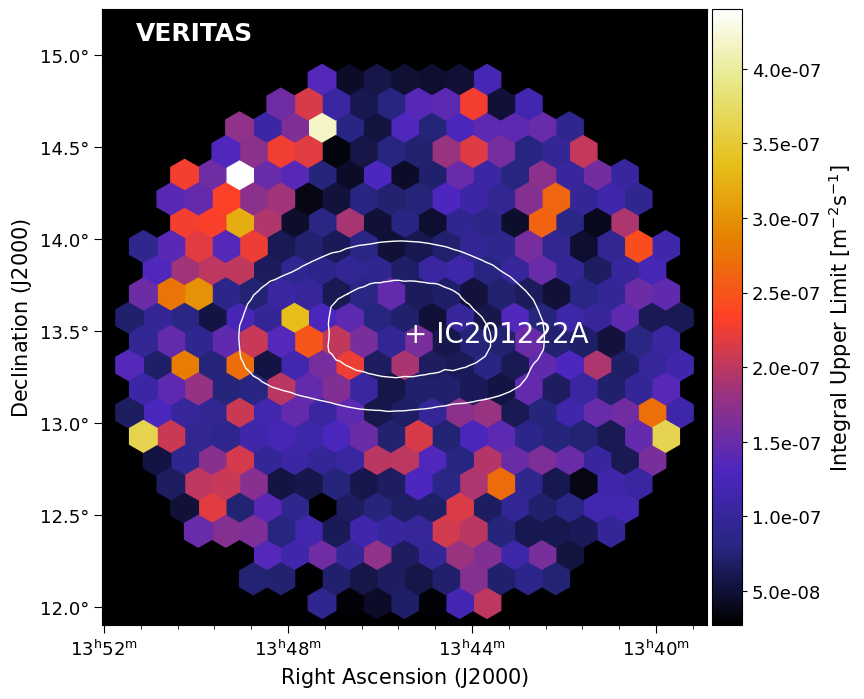

In [119]:

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8, 8)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
#values will be accumulated in the bins.
im2=ax1.hexbin(df['RA'],list(df['Dec']), C=list(df['Flux_UL']*1e4),gridsize=(20), cmap='CMRmap')
ax1.set_aspect(1)
# cmap = cm.get_cmap('viridis') 
divider = make_axes_locatable(im2.axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=fig1.colorbar(im2, cax=cax)

def sci_notation(x, pos):
    return f"{x:.1e}"

cbar.ax.yaxis.set_major_formatter(FuncFormatter(sci_notation))


cbar.set_label('Integral Upper Limit $\mathrm{[m^{-2}s^{-1}]}$',size="15")
cbar.ax.tick_params(labelsize=13)

ax1.text(source[run]['ra'],source[run]['dec'], "+ "+run, size="20",color="white",rotation=0)
if (run=='IC191001A'):
    ax1.text( 314.2623926, 14.2044063, "* AT2019dsg", size="20",color="white",rotation=0)
    ax1.set_ylim(10.4, 15)

if (run=='IC201222A'):
    ax1.set_ylim(11.9, 15.25)

ax1.set_xlabel("$\mathrm{Right~Ascension~(J2000)}$",fontsize=15)
ax1.set_ylabel("$\mathrm{Declination~(J2000)}$",fontsize=15)
ax1.invert_xaxis()
ax1.tick_params(axis='both', labelsize=13)
ax1.tick_params(which='major', length=6,direction="out")
ax1.tick_params(which='minor', length=3,direction="out")
ax1.set_facecolor('k')



def ra_formatter_hms_tex(x, pos):
    angle = Angle(x, unit='deg')
    hms = angle.hms
    return r"${:0.0f}^{{\mathrm{{h}}}}{:02.0f}^{{\mathrm{{m}}}}$".format(hms.h, hms.m)

ax1.xaxis.set_major_locator(MultipleLocator(1))  # 15 deg = 1 hour
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_major_formatter(FuncFormatter(ra_formatter_hms_tex))


def deg_formatter(x, pos):
    # x is the numeric tick value, pos is its position (ignored here)
    return f"{x:.1f}°"    # one decimal, then ° sign

ax1.yaxis.set_major_formatter(FuncFormatter(deg_formatter))


##Lable
ax1.text(
    0.25, 0.98, "VERITAS", 
    transform=ax1.transAxes, 
    ha='right', va='top', 
    fontsize=18, color='white',
    fontweight='bold'
)


# #add IC contours

myfile=open("IC_contours/"+source[run]['IC50'])
lines=myfile.readlines()
RA_50= np.array([])
Dec_50 = np.array([])
for line in lines[1:]:
    RA_50=np.append(RA_50,float(line.split()[0])) 
    Dec_50=np.append(Dec_50,float(line.split()[1]))
RA_50=np.rad2deg(RA_50)
Dec_50=np.rad2deg(Dec_50)
# ax1.plot(RA_50, Dec_50, c='white', label="50% contour", linestyle='-', linewidth=1) 
ax1.plot(RA_50, Dec_50, c='white', linestyle='-', linewidth=1) 

if (run!='IC191001A'):
    myfile=open("IC_contours/"+source[run]['IC90'])
    lines=myfile.readlines()
    RA_90= np.array([])
    Dec_90 = np.array([])
    for line in lines[1:]:
        RA_90=np.append(RA_90,float(line.split()[0])) 
        Dec_90=np.append(Dec_90,float(line.split()[1]))
    RA_90=np.rad2deg(RA_90)
    Dec_90=np.rad2deg(Dec_90)
    # ax1.plot(RA_90, Dec_90, c='white', label="90% contour",linestyle='-',linewidth=1) 
    ax1.plot(RA_90, Dec_90, c='white',linestyle='-',linewidth=1) 


# ax1.legend(prop={"size":12},loc=2)
fig1.savefig(run+"_VERITAS"+".pdf", 
               bbox_inches='tight', 
               transparent=False,
               pad_inches=0)
# fig1.savefig(run+"_VERITAS"+".pdf", 
#                transparent=False,
#                pad_inches=0)

In [114]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.coordinates import SkyCoord
import astropy.units as u

# Get hexbin info
verts = im2.get_offsets()     # (RA, Dec) of hexbin centers
vals = im2.get_array()        # Corresponding flux values

# Determine binning
nx, ny = im2.get_offsets().T[0].ptp(), im2.get_offsets().T[1].ptp()
# Number of bins you specified manually
xsize = 20  # same as gridsize in hexbin
ysize = 20  # or estimate based on RA/Dec aspect ratio if needed

# Create RA/Dec grid
ra_min, ra_max = verts[:, 0].min(), verts[:, 0].max()
dec_min, dec_max = verts[:, 1].min(), verts[:, 1].max()

# Define pixel scale (deg/pixel)
cdelt_ra = -(ra_max - ra_min) / xsize  # negative because RA increases to the left
cdelt_dec = (dec_max - dec_min) / ysize

# Define WCS (tangent-plane projection)
w = WCS(naxis=2)
w.wcs.crpix = [xsize / 2, ysize / 2]
w.wcs.cdelt = np.array([cdelt_ra, cdelt_dec])
w.wcs.crval = [(ra_max + ra_min) / 2, (dec_max + dec_min) / 2]  # center in RA, Dec
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# Create 2D array for the image
image_data = np.full((ysize, xsize), np.nan)

# Map each hexbin value to corresponding pixel in image array
for (ra, dec), val in zip(verts, vals):
    xpix, ypix = skycoord_to_pixel(SkyCoord(ra*u.deg, dec*u.deg, frame='icrs'), w)
    xpix = int(np.round(xpix))
    ypix = int(np.round(ypix))
    if 0 <= xpix < xsize and 0 <= ypix < ysize:
        image_data[ypix, xpix] = val

# Save to FITS
hdu = fits.PrimaryHDU(data=image_data, header=w.to_header())
hdul = fits.HDUList([hdu])
hdul.writeto(f"{run}.fits", overwrite=True)

# # Save
# hdul.writeto(f"{run}.fits", overwrite=True)